### Cleaning Data

In [1]:
# pd.DataFrame.describe()
# pd.DataFrame.info()

In [2]:
# Converting types in a Data Frame column
# df.column = df.column.astype(int) ...or astype(float), etc.

# factor types: categoricals, ordinals (low, medium, high)

#### Converting custom N/A values

In [3]:
# pd.read_csv(..., na_values=['N/A', 'Unknown'])
# or
# pd.DataFrame.replace('N/A', None)

#### Dropping nulls, Filling nulls

In [4]:
# pd.DataFrame.dropna(axis=1, how='any') ...check documentation

In [5]:
# pd.DataFrame.fillna(method='bfill')

# or use interpolate on time series data:
# df.column.interpolate()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)

In [9]:
data.replace({'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}, inplace=True)

In [10]:
data.replace({'GdPrv': 2, 'GdWd': 2, 'MnPrv': 1, 'MnWw': 1}, inplace=True)

In [11]:
data.MSZoning.replace({'C (all)': 'C'})

0       RL
1       RL
2       RL
3       RL
4       RL
5       RL
6       RL
7       RL
8       RM
9       RL
10      RL
11      RL
12      RL
13      RL
14      RL
15      RM
16      RL
17      RL
18      RL
19      RL
20      RL
21      RM
22      RL
23      RM
24      RL
25      RL
26      RL
27      RL
28      RL
29      RM
        ..
1430    RL
1431    RL
1432    RL
1433    RL
1434    RL
1435    RL
1436    RL
1437    RL
1438    RM
1439    RL
1440    RL
1441    RM
1442    FV
1443    RL
1444    RL
1445    RL
1446    RL
1447    RL
1448    RL
1449    RM
1450    RL
1451    RL
1452    RM
1453    RL
1454    FV
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [12]:
data.MasVnrType.fillna('None')

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
5          None
6         Stone
7         Stone
8          None
9          None
10         None
11        Stone
12         None
13        Stone
14      BrkFace
15         None
16      BrkFace
17         None
18         None
19         None
20      BrkFace
21         None
22      BrkFace
23         None
24         None
25        Stone
26         None
27        Stone
28         None
29         None
         ...   
1430       None
1431       None
1432       None
1433    BrkFace
1434       None
1435    BrkFace
1436       None
1437      Stone
1438       None
1439    BrkFace
1440       None
1441    BrkFace
1442      Stone
1443       None
1444    BrkFace
1445       None
1446    BrkFace
1447    BrkFace
1448       None
1449       None
1450       None
1451      Stone
1452    BrkFace
1453       None
1454       None
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length

In [13]:
df = data.groupby(['MasVnrType'])

In [14]:
df.agg(np.count_nonzero)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15.0,15,15,15,15,15,15,...,0,15.0,15,15,2,15,15,15,15,15
BrkFace,445,445,445,445.0,445,445,445,445,445,445,...,2,445.0,445,445,11,445,445,445,445,445
None,864,864,864,864.0,864,864,864,864,864,864,...,4,864.0,864,864,38,864,864,864,864,864
Stone,128,128,128,128.0,128,128,128,128,128,128,...,1,128.0,128,128,1,128,128,128,128,128


In [15]:
data.LotFrontage.fillna(0)
data.MasVnrArea.fillna(0)
data.BsmtFinSF1.fillna(0)
data.BsmtFinSF2.fillna(0)
data.BsmtUnfSF.fillna(0)
data.TotalBsmtSF.fillna(0)
data.BsmtFullBath.fillna(0)
data.BsmtHalfBath.fillna(0)
data.GarageCars.fillna(0)
data.GarageArea.fillna(0)

0       548
1       460
2       608
3       642
4       836
5       480
6       636
7       484
8       468
9       205
10      384
11      736
12      352
13      840
14      352
15      576
16      480
17      516
18      576
19      294
20      853
21      280
22      534
23      572
24      270
25      890
26      576
27      772
28      319
29      240
       ... 
1430    372
1431    440
1432    216
1433    451
1434    484
1435    462
1436    528
1437    774
1438    923
1439    550
1440    672
1441    420
1442    812
1443    192
1444    626
1445    240
1446    312
1447    556
1448    384
1449      0
1450      0
1451    840
1452    525
1453      0
1454    400
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64

### Exploratory Data Analsis

In [16]:
# pd.DataFrame.describe()
# pd.DataFrame.info()

In [17]:
# filter and query/subset the data based on filters

In [18]:
# sort_values(), value_counts()

In [19]:
# groupby and stack the data: df.groupby([df.column1, ...])[df.column3].sum() ...or .size(), etc.
# pivot the data: df.pivot(index=..., columns=..., values=...)

In [20]:
# transform data with a function:
# f = lambda x: len(str(x))
# df[df.column].map(f)

In [21]:
# merge the data set on itself

In [22]:
import os
os.curdir

'.'

In [23]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.00000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,3.39589,...,46.660274,21.954110,3.409589,15.060959,2.758904,3.714286,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,0.57428,...,66.256028,61.119149,29.317331,55.757415,40.177307,1.253566,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,...,25.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,4.00000,...,68.000000,0.000000,0.000000,0.000000,0.000000,4.500000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,...,547.000000,552.000000,508.000000,480.000000,738.000000,5.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Sales Price distribution plots

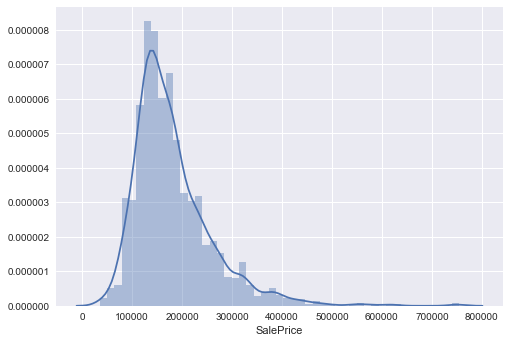

In [26]:
sns.distplot(data.SalePrice)
plt.show()

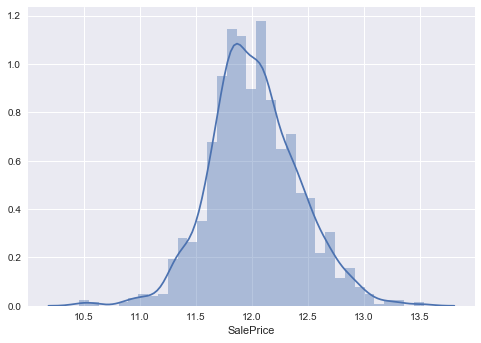

In [27]:
sns.distplot(np.log(data.SalePrice))
plt.show()

#### Top Neighborhoods and boxplot

In [28]:
nbhood_sales = pd.DataFrame(data, columns=['Neighborhood', 'SalePrice'])
nbhood_sales = nbhood_sales.groupby(nbhood_sales.Neighborhood).agg([np.median, np.count_nonzero])
nbhood_sales.sort_values([('SalePrice', 'median')], ascending=False).head()

SalePrice              
                median count_nonzero
Neighborhood                        
NridgHt         315000            77
NoRidge         301500            41
StoneBr         278000            25
Timber          228475            38
Somerst         225500            86

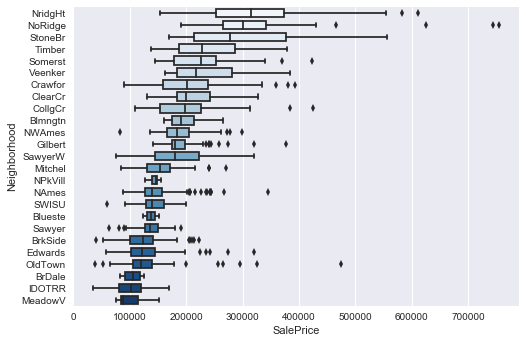

In [29]:
df = data.sort_values('Neighborhood')
ranks = data.groupby('Neighborhood')['SalePrice'].median().fillna(0).sort_values(ascending=False).index
sns.boxplot(df.SalePrice, df.Neighborhood, order=ranks, palette=sns.color_palette("Blues", 25), width=0.7)
plt.figure(figsize=(6, 8))
plt.show()

#### Quality Indicator boxplots

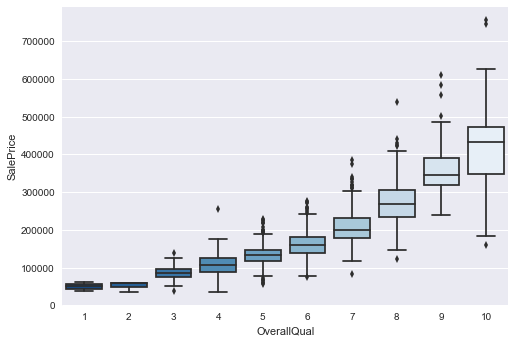

In [30]:
sns.boxplot(data.OverallQual, data.SalePrice, palette=sns.color_palette("Blues_r", 10))
plt.figure(figsize=(8, 6))
plt.show()

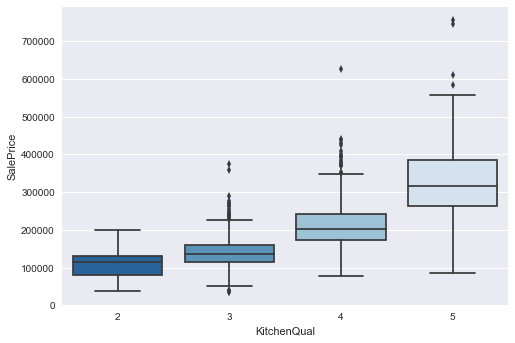

In [31]:
sns.boxplot(data.KitchenQual, data.SalePrice, palette=sns.color_palette("Blues_r", 4))
plt.figure(figsize=(8, 6))
plt.show()

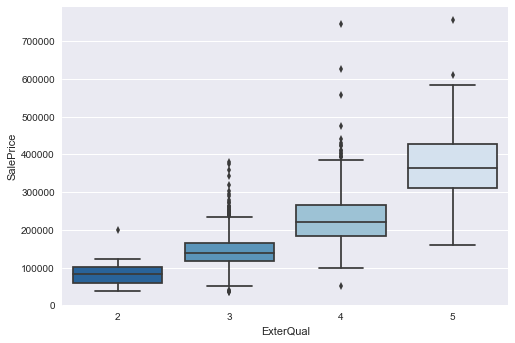

In [32]:
sns.boxplot(data.ExterQual, data.SalePrice, palette=sns.color_palette("Blues_r", 4))
plt.figure(figsize=(8, 6))
plt.show()

#### Recent Remodel

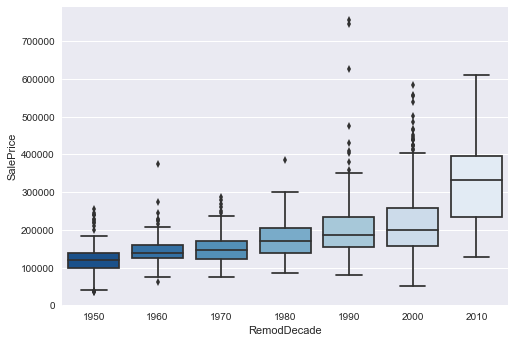

In [33]:
d = data
d['RemodDecade'] = d.YearRemodAdd // 10 * 10
sns.boxplot(d.RemodDecade, d.SalePrice, palette=sns.color_palette("Blues_r", 7))
plt.figure(figsize=(8, 6))
plt.show()

#### Above Ground Living Area distribution, scatter and boxplot

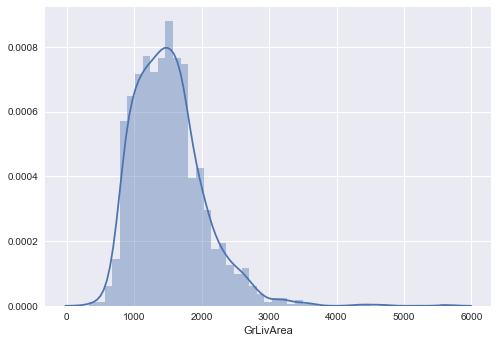

In [34]:
sns.distplot(data.GrLivArea)
plt.show()

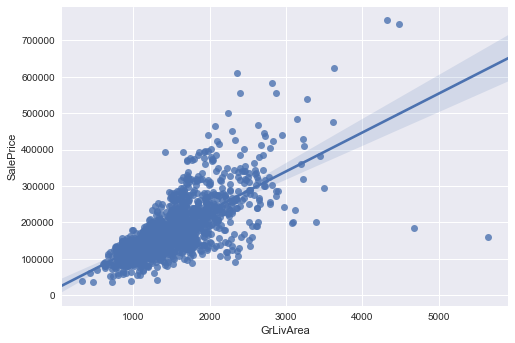

In [35]:
d = data
sns.regplot(d.GrLivArea, d.SalePrice, scatter=True)

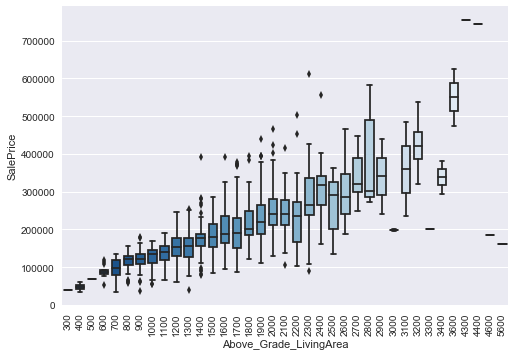

In [36]:
d = data
d['Above_Grade_LivingArea'] = d.GrLivArea // 100 * 100
d.Above_Grade_LivingArea
sns.boxplot(d.Above_Grade_LivingArea, d.SalePrice, palette=sns.color_palette("Blues_r", 37), width=0.7)
plt.xticks(rotation=90)
plt.figure(figsize=(6, 8))
plt.show()

#### Total Basement SF scatterplot

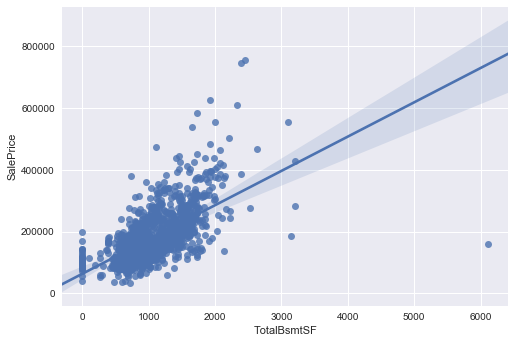

In [37]:
d = data
sns.regplot(d.TotalBsmtSF, d.SalePrice, scatter=True)